In [ ]:
import pandas as pd
from joblib import dump

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# to transform boolean and string columns to numeric values
le = LabelEncoder()

df = pd.read_csv("accident.csv")

df['Gender'] = le.fit_transform(df['Gender'])
df['Helmet_Used'] = le.fit_transform(df['Helmet_Used'])
df['Seatbelt_Used'] = le.fit_transform(df['Seatbelt_Used'])

y = df['Survived']                  # column to be predicted
x = df.drop('Survived', axis=1)     # whole df without prediction column

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.10, random_state=42)


model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=20,
    min_samples_split=10
)

model.fit(X_train, Y_train)

# to save the model 
dump(model, 'model_dump.pkl')

Y_real = Y_train
Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_real, Y_pred)
Y_real = Y_test
Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_real, Y_pred)
print(train_error, test_error) # 0.1388888888888889 0.65





0.1388888888888889 0.65


In [33]:
import pandas as pd
from joblib import dump
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



# to transform boolean and string columns to numeric values
le = LabelEncoder()

scaler = StandardScaler()

df = pd.read_csv("California Wildfire Damage.csv")

df['Location'] = le.fit_transform(df['Location'])
df['Cause'] = le.fit_transform(df['Cause'])

df['Year'] = df['Date'].apply(lambda x: int(x[:4]))  # Extracts year as integer
df['Month'] = df['Date'].apply(lambda x: int(x[5:7]))  # Extracts month as integer

df[['Year', 'Month']] = scaler.fit_transform(df[['Year', 'Month']])
df.drop(columns=['Date'], inplace=True)  

df.drop(columns=['Incident_ID'], inplace=True)


# df['Date']

y = df['Estimated_Financial_Loss (Million $)']                  # column to be predicted
x = df.drop('Estimated_Financial_Loss (Million $)', axis=1)     # whole df without prediction column

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.10, random_state=233)

model = DecisionTreeRegressor( # Versão do Desicion Tree de Regressão
    max_depth=200,
    min_samples_split=40
)

model.fit(X_train, Y_train)

# to save the model 
dump(model, 'california_fires_model_dump.pkl')

Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_train, Y_pred)

Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_test, Y_pred)
print(train_error, test_error) #531.3660894179894 1495.453061904762




1092.8335504273505 1493.810587179487


0.14979547698528375 0.19572167371885285


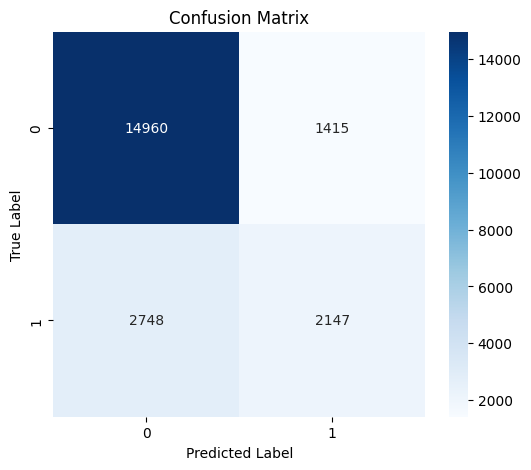

In [9]:
import pandas as pd
from joblib import dump
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# to transform boolean and string columns to numeric values
le = LabelEncoder()

scaler = StandardScaler()

df = pd.read_csv("thyroid_cancer_risk_data.csv")

df['Gender'] = le.fit_transform(df['Gender'])
df['Country'] = le.fit_transform(df['Country'])
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])
df['Family_History'] = le.fit_transform(df['Family_History'])
df['Radiation_Exposure'] = le.fit_transform(df['Radiation_Exposure'])
df['Iodine_Deficiency'] = le.fit_transform(df['Iodine_Deficiency'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Obesity'] = le.fit_transform(df['Obesity'])
df['Diabetes'] = le.fit_transform(df['Diabetes'])
df['Thyroid_Cancer_Risk'] = le.fit_transform(df['Thyroid_Cancer_Risk'])
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

df.drop(columns=['Patient_ID'], inplace=True)


# df['Date']

y = df['Diagnosis']                  # column to be predicted
x = df.drop('Diagnosis', axis=1)     # whole df without prediction column

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.10, random_state=233)

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=20,
    min_samples_split=10
)

model.fit(X_train, Y_train)

# to save the model 
dump(model, 'thyroid_model_dump.pkl')

Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_train, Y_pred)

Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_test, Y_pred)
print(train_error, test_error) # 0.1498163733341692 0.19600376116596144

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


